In [29]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [30]:
mnist['data'].shape

(70000, 784)

In [109]:
mnist['data'].max()

pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64

In [31]:
mnist['target'].shape

(70000,)

In [49]:
X,y = mnist['data'],mnist["target"]
y = y.astype(np.uint8)

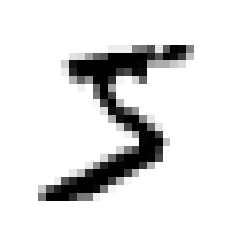

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.head(1).to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [51]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# Since it is already randomised according to the DB docs

In [52]:
#Let first try to train a KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
knn_clf.score(X_test, y_test)

0.9688

In [65]:
#Let's try to get a bit bettter result after playing with the hyperparameters

from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("knn_clf", KNeighborsClassifier(n_neighbors=50)),
])
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'knn_clf', 'knn_clf__algorithm', 'knn_clf__leaf_size', 'knn_clf__metric', 'knn_clf__metric_params', 'knn_clf__n_jobs', 'knn_clf__n_neighbors', 'knn_clf__p', 'knn_clf__weights'])

In [69]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = dict(knn_clf__n_neighbors=range(45, 65))
grid_clf = RandomizedSearchCV(pipeline, param_grid, cv=2, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ............................knn_clf__n_neighbors=48; total time=  21.5s
[CV] END ............................knn_clf__n_neighbors=48; total time=  20.9s
[CV] END ............................knn_clf__n_neighbors=62; total time=  23.1s
[CV] END ............................knn_clf__n_neighbors=62; total time=  21.5s
[CV] END ............................knn_clf__n_neighbors=47; total time=  23.7s
[CV] END ............................knn_clf__n_neighbors=47; total time=  22.0s
[CV] END ............................knn_clf__n_neighbors=49; total time=  20.9s
[CV] END ............................knn_clf__n_neighbors=49; total time=  20.8s
[CV] END ............................knn_clf__n_neighbors=45; total time=  21.9s
[CV] END ............................knn_clf__n_neighbors=45; total time=  21.3s
[CV] END ............................knn_clf__n_neighbors=55; total time=  22.4s
[CV] END ............................knn_clf__n_

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('knn_clf',
                                              KNeighborsClassifier(n_neighbors=50))]),
                   param_distributions={'knn_clf__n_neighbors': range(45, 65)},
                   verbose=2)

In [70]:
grid_clf.best_params_

{'knn_clf__n_neighbors': 45}

In [71]:
grid_clf.score(X_test, y_test)

0.9551

In [72]:
#So we can see a big amount of neighbors isen't exactly making things better lets try again with much less

In [74]:
param_grid = dict(knn_clf__n_neighbors=range(3, 15))
grid_clf = RandomizedSearchCV(pipeline, param_grid, cv=2, verbose=2)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ............................knn_clf__n_neighbors=10; total time=  21.3s
[CV] END ............................knn_clf__n_neighbors=10; total time=  20.4s
[CV] END .............................knn_clf__n_neighbors=6; total time=  20.9s
[CV] END .............................knn_clf__n_neighbors=6; total time=  20.9s
[CV] END .............................knn_clf__n_neighbors=3; total time=  19.0s
[CV] END .............................knn_clf__n_neighbors=3; total time=  20.0s
[CV] END ............................knn_clf__n_neighbors=14; total time=  21.8s
[CV] END ............................knn_clf__n_neighbors=14; total time=  21.0s
[CV] END .............................knn_clf__n_neighbors=7; total time=  22.5s
[CV] END .............................knn_clf__n_neighbors=7; total time=  21.4s
[CV] END ............................knn_clf__n_neighbors=12; total time=  22.2s
[CV] END ............................knn_clf__n_

{'knn_clf__n_neighbors': 3}

In [75]:
grid_clf.score(X_test, y_test)

0.9705

In [78]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9627

In [111]:
#So it seems like we got a good option on 3 neighbors after checking quite a large span of options. 
#Let's try training a linder classifier on the MNIST DB, Note that we are not scaling here because all the features are in a range 0-1
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
svm_pipeline = Pipeline([
            ('std_scaler', StandardScaler()),
            ("svm_clf", LinearSVC())
        ])
print("here")
svm_pipeline.fit(X_train, y_train)
svm_pipeline.score(X_test, y_test)

here


/Users/tomer/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9093

In [103]:
#Let's try an SGDClassifier aswell and test it against the linearsvc
from sklearn.linear_model import SGDClassifier 
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [104]:
sgd_clf.score(X_test, y_test)

0.874

In [112]:
#So that diden't go so well. Maybe we can make it better if we try to use a OvA startegy using SVM's
from sklearn.multiclass import OneVsRestClassifier
ovo_clf = OneVsRestClassifier(svm_pipeline)
ovo_clf.fit(X_train,y_train)


/Users/tomer/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tomer/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tomer/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tomer/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tomer/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tomer/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206

OneVsRestClassifier(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                              ('svm_clf', LinearSVC())]))

In [113]:
ovo_clf.score(X_test,y_test)


0.9088